#### Data Mining Technique that epresent's the general public sentiment on Social Media using NLP.


* sentiment Analysis is also known as opinion mining.
* Steps Involved :-
    1. Installing tweepy
    
    2. creating account with Twitter API
    
    3. Importing libraries
    
    4. connecting with Twitter API
    
    5. Iterate and Analyse the tweet data
    
    6. Print the result with pie chart



In [3]:
!pip install tweepy

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def percentage(part,whole):
    return 100 * float(part) /float(whole)

In [8]:
#connecting with twitter APIs

#importing the keys
consumerKey = 'KVq08r8evvdYrCCHnkrQjceuo'
consumerSecret = 'jc3CqPNTFmzBvA7IVu7GZJ6S3zdfpGkz7QTJaZ3YU4qtp9UKaW'
accessToken = '1075058762753269761-HYc8VLLYrnbreDmlvRyE7HN5GfRVZa'
accessTokenSecret = 'Htzam9S2iRK7FKr6PgHAiHkaJTVU19EsaEmtuRUAYjyjC'


In [9]:
#establish the connection with API
auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth)

In [46]:
searchTerm = input("Enter the key word / tag to search : ")
NoOfTerms = int(input("Enter how many tweets to search : "))

Enter the key word / tag to search : Narendra Modi
Enter how many tweets to search : 20


In [47]:
#get number of tweets and search term together
tweets = tweepy.Cursor(api.search,q=searchTerm).items(NoOfTerms)

In [14]:
tweets

In [34]:
#iterate and analyze the tweets data
a = TextBlob("I am a bad cricket player")
a.sentiment.polarity

-0.6999999999999998

In [16]:
b = TextBlob("I am a good cricket player")
b.sentiment.polarity

0.7

In [48]:
#create variables to hold the average polarity
positive  =0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
    analysis = TextBlob(tweet.text)
   
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity > 0.00):
        positive +=1
    elif (analysis.sentiment.polarity < 0.00):
        negative +=1
    else:
        neutral +=1

In [49]:
#genearte percantage using percentage function
positive  = percentage(positive,NoOfTerms)
negative = percentage(negative,NoOfTerms)
neutral = percentage(neutral,NoOfTerms)
polarity = percentage(polarity,NoOfTerms)

In [50]:
print("percentage of positive sentiments {}".format(positive,'.2f'))
print("percentage of negative sentiments {}".format(negative,'.2f'))
print("percentage of neutral sentiments {}".format(neutral,'.2f'))
print("polarity of the tweet {}".format(polarity,'.2f'))

percentage of positive sentiments 25.0
percentage of negative sentiments 5.0
percentage of neutral sentiments 70.0
polarity of the tweet 6.363636363636365


In [51]:
#print results
print("How people are reacting on " +searchTerm + " by analyzing "+str(NoOfTerms)+" Tweets")
if polarity > 0.00:
    print("Positive")
elif polarity < 0.00:
    print("Negative")
else:
    print('neutral')

How people are reacting on Narendra Modi by analyzing 20 Tweets
Positive


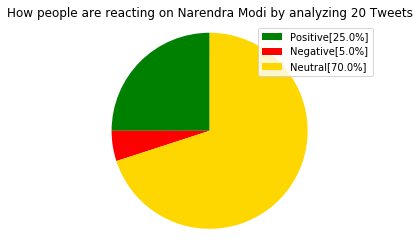

In [52]:
#represent the polarity on a pie chart
labels = ['Positive['+str(positive)+'%]',
          'Negative['+str(negative)+'%]',
          'Neutral['+str(neutral)+'%]'
         ]
sizes = [positive,negative,neutral]
colors = ['green','red','gold']
patches,texts = plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.title("How people are reacting on " +searchTerm + " by analyzing "+str(NoOfTerms)+" Tweets")
plt.axis("equal")
plt.tight_layout
plt.show()